AAI-501 Group 7 Notebook (A)

Data Set Selection 

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


In [294]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# join the features and target variable into a singe dataframe for EDA
df = X.join(y)
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

Setup

In [295]:
import pandas as pd
from summarytools import dfSummary
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display, Markdown
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import math
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, KBinsDiscretizer
import eda_toolkit as eda
from eda_toolkit import dataframe_columns
from eda_toolkit import box_violin_plot
from eda_toolkit import kde_distributions
import textwrap
from eda_toolkit import stacked_crosstab_plot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve



EDA

In [296]:
# added this view from #EDA-Toolkit to provide a quick view of the data

dataframe_columns(df=df)

Shape:  (4424, 37) 

Total seconds of processing time: 0.104183


,column,dtype,null_total,null_pct,unique_values_total,max_unique_value,max_unique_value_total,max_unique_value_pct
0,Marital Status,int64,0,0.0,6,1,3919,88.58
1,Application mode,int64,0,0.0,18,1,1708,38.61
2,Application order,int64,0,0.0,8,1,3026,68.40
3,Course,int64,0,0.0,17,9500,766,17.31
4,Daytime/evening attendance,int64,0,0.0,2,1,3941,89.08
5,Previous qualification,int64,0,0.0,17,1,3717,84.02
6,Previous qualification (grade),float64,0,0.0,101,133.1,491,11.10
7,Nacionality,int64,0,0.0,21,1,4314,97.51
8,Mother's qualification,int64,0,0.0,29,1,1069,24.16
9,Father's qualification,int64,0,0.0,34,37,1209,27.33


In [297]:
# The target variable is categorical, so we need to change it to numerical for the model. 
# Favorable outcomes are 'Graduate' and 'Enrolled', while 'Dropout' is unfavorable. 
# We will change the target variable to numerical, where 1 is favorable and 0 is unfavorable.

# change the target variable to numerical
mapping = {'Graduate': 1, 'Enrolled': 1, 'Dropout': 0}
df['Target_Num'] = df['Target'].map(mapping)
df = df.drop(['Target'], axis=1)
df.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Num
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [298]:
# create a new dataset y with Target_Num as the target variable
y = df['Target_Num']
y = pd.DataFrame(y)
print(y)

      Target_Num
0              0
1              1
2              0
3              1
4              1
...          ...
4419           1
4420           0
4421           0
4422           1
4423           1

[4424 rows x 1 columns]


In [299]:
#summary of the data in X

dfSummary(X)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Marital Status[int64],Mean (sd) : 1.2 (0.6)min < med < max:1.0 < 1.0 < 6.0IQR (CV) : 0.0 (1.9),6 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAALAAAABMCAYAAADN5z08AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACAklEQVR4nO3XwW3jMBBG4ZmFobUAg4SgjcpwASoixaYIXV0JEVCHyAnW5laQKJadWH/2fWcPOYcHwfRSigGqft17AeAaBAxpm7kfuHttZtUVd7yVUqYr5oF3fRiwu9dt2z6GEJqlF4zj+OzuT0SMrzD3Ba5CCE3f91OM8Xjp4Tnn7TAMTUqpMjMCxs3N/oUwM4sxHruue1l4R71wDpjFIw7SCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSNvdeYI6712ZWXXHEWyllutU+WJdVB+zuddu2jyGEZukZ4zg+u/sTEf9Mqw7YzKoQQtP3/RRjPF46nHPeDsPQpJQqMyPgH2jtAZuZWYzx2HXdy8Lx+qbLYFV4xEGaxBf4f8Yj9mMEvGI8Yud9KuCc83bJ4Tnn7el02phZcPclR4Tz+by54/33Fna73cN+v/9b1/XrpcPTNP0+HA4PKaU/7j5+xYLf4LWU8u4D/h/5K3Di7R6oHwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Application mode[int64],Mean (sd) : 18.7 (17.5)min < med < max:1.0 < 17.0 < 57.0IQR (CV) : 38.0 (1.1),18 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAALAAAABMCAYAAADN5z08AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpUlEQVR4nO3cv27aUBiG8e/wJz0BZECoycbSgaFSh4y5iF5sL6FDLiBiZaiyRRBkhAvF2PQKgoMNwa/9/OYcbEWP0PERn93hcDBAVePaNwAUQcCQ1sr6A+fcrZndFLjG7nA4bAqsB951NGDn3O1oNPoZBMEw7wVWq9XSOfeLiHEJWd/AN0EQDB8fHzf9fn976oeHYeifnp6Gi8XixswIGGeXuYUwM+v3+9u7u7u/Oa9xm3MdkImHOEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEgjYEj70Nspr4kXbOOYUgfMC7aRpdQBGy/YRoayB2xmvGAb7+MhDtIIGNIkthB1xinMcQRcYpzCZCPgcuMUJgMBC+AU5n08xEEaAUMaAUMaAUMaD3EVlyRJ28wC51zejyj1OTIBV1gURe04jn+Mx+Nms9k8+RjOrPznyARcYbvdruW97zw8PGzv7++Xp65XOEcm4BrodruVPUfmIQ7SCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSCBjSLv574IIjLUGapu0z3xIq5KIBFx1piePYJ0nyfbvd/jazXD/IrvpMWN1dNOCiIy0vLy/D6XTa2e/3zTzXr8NMWN19ykhR3pGW5XJZaJylDjNhdVeLmbgqz4Rd2hm2YA0zSwvcwtEtXC0CRj5Ft2BJkrSjKPrW6/VmjUYjznMPWVu4DwUchqHPc/H1eu3NzKIo8q+vrx219WEY+iRJWlbsG6iIIE3T1rX+/29vbz3vfWcymbjBYPDv1PXz+dzPZrOvk8nkz2AwWJ+6frPZfHl+fj66hfsPjhY+wG+aA70AAAAASUVORK5CYII="">",0(0.0%)
3,Application order[int64],Mean (sd) : 1.7 (1.3)min < med < max:0.0 < 1.0 < 9.0IQR (CV) : 1.0 (1.3),8 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAALAAAABMCAYAAADN5z08AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWUlEQVR4nO3ZPY7aUBSG4XMCw5hBMUKMTMcSUlDSZAdZ7LQpkcxWEJJlbMFAQOA0mSo/I2wc/Hnepz+XW7yY64sXRWGAqk/33gBQBQFDWrfuD3D3vpn1KixxLIpif6v9oF1qDdjd++Px+FsYhqOya+R5nrr7CxHjT+p+AvfCMBzN5/P9cDg8XDucZVkQx/EoSZKemREwflP7EcLMbDgcHqIoei053r/pZtAqvMRBGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDGgFDWvfeG3jP+Xx+MLPQ3csucSyKYn/DLaFBGh3wbrd7OJ1OX6bTaafT6RzKrJHneeruL0TcTo0O+Hg8doMgeJrNZofJZJJeO59lWRDH8ShJkp6ZEXALNTrgN4PB4BBF0WvJ8f5NN4NG4SUO0ggY0iSOEFVwi9FurQ74FrcYm81m6+7fzazUvPEFqFWrA656i7FarT4vl8uv0+n0mWu8Zmp1wG/K3mKkadqveo23WCyiJEme3T2/dv4XnuD/8CECrqrsF4AjTP0IuEYcYepHwP/BPY8wbf8n8t2A3T0ws8eS64eXy6WbZVlQZni73QZmZrvdLliv108fdb6K8/nctWrXiPf2oyiKv/76/ASKG/uJK7rXQgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Course[int64],Mean (sd) : 8856.6 (2063.6)min < med < max:33.0 < 9238.0 < 9991.0IQR (CV) : 471.0 (4.3),17 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAALAAAABMCAYAAADN5z08AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACGUlEQVR4nO3XTW7aUBSG4XNaatkZ3CvLkjeRHXgRWWyW0IFXwA6YIVnoWhCsgHHnlZKAHUS/6n2m5v5I5zUCn6bJAFU/Hn0BYAkChrTVoy+A/5u7F2aWLdji

In [300]:
#summary of the data in y

dfSummary(y)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Target_Num[int64],Mean (sd) : 0.7 (0.5)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 1.0 (1.5),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAALAAAABMCAYAAADN5z08AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABjUlEQVR4nO3dT2rCQBiH4ZkiopsEETyMh+hhewhvI2VcVCloegL/1JDKrzzPdjJDFi+B2eSrwzAUSPX26heAMQRMtNmrX4D/rda6LKXMRxzxPQzD8dqigJlMrXW5Xq/fu65bPXvG4XD4rLV+XItYwExp3nXdarvdHvu+P/12c2ttsdvtVvv9fl5KETCv0ff9abPZfD25fXlr0SWOaAImmoCJJmCiCZhoAiaagIkmYKIJmGgCJpqAiSZgogmYaAImmoCJJmCiCZhoAiaagIkmYKIJmGgCJpqAiSZgogmYaAImmoCJJmCiCZhoAiaagIkmYKIJmGgCJtrdEQNTT5mBMW4G/BdTZmCMe1/gyafMwBgPTSmacsoMjOESRzQBE03ARBMw0QRMNAETTcBEEzDRBEw0ARNNwEQTMNEETDQBE03ARBMw0QRMNAETTcBEEzDRBEw0ARNNwEQTMNEETDQBE03ARBMw0QRMNAET7aHfq7bWFs8c3lpbnM/nWSmlq7U+cwTZusvlMhvTz71nfgAq/U6Jyfwn0QAAAABJRU5ErkJggg=="">",0(0.0%)


In [301]:
#check for duplicates

df.duplicated().sum()


0

In [302]:
#display the shape of the new dataset

df.shape


(4424, 37)

Summary:

1. Categorical column Target changed to numerical column Target_Num
2. No missing values in the dataset
3. No duplicates in the dataset
4. There are 37 columns (features) including the target feature
5. Thre are 4424 rows.

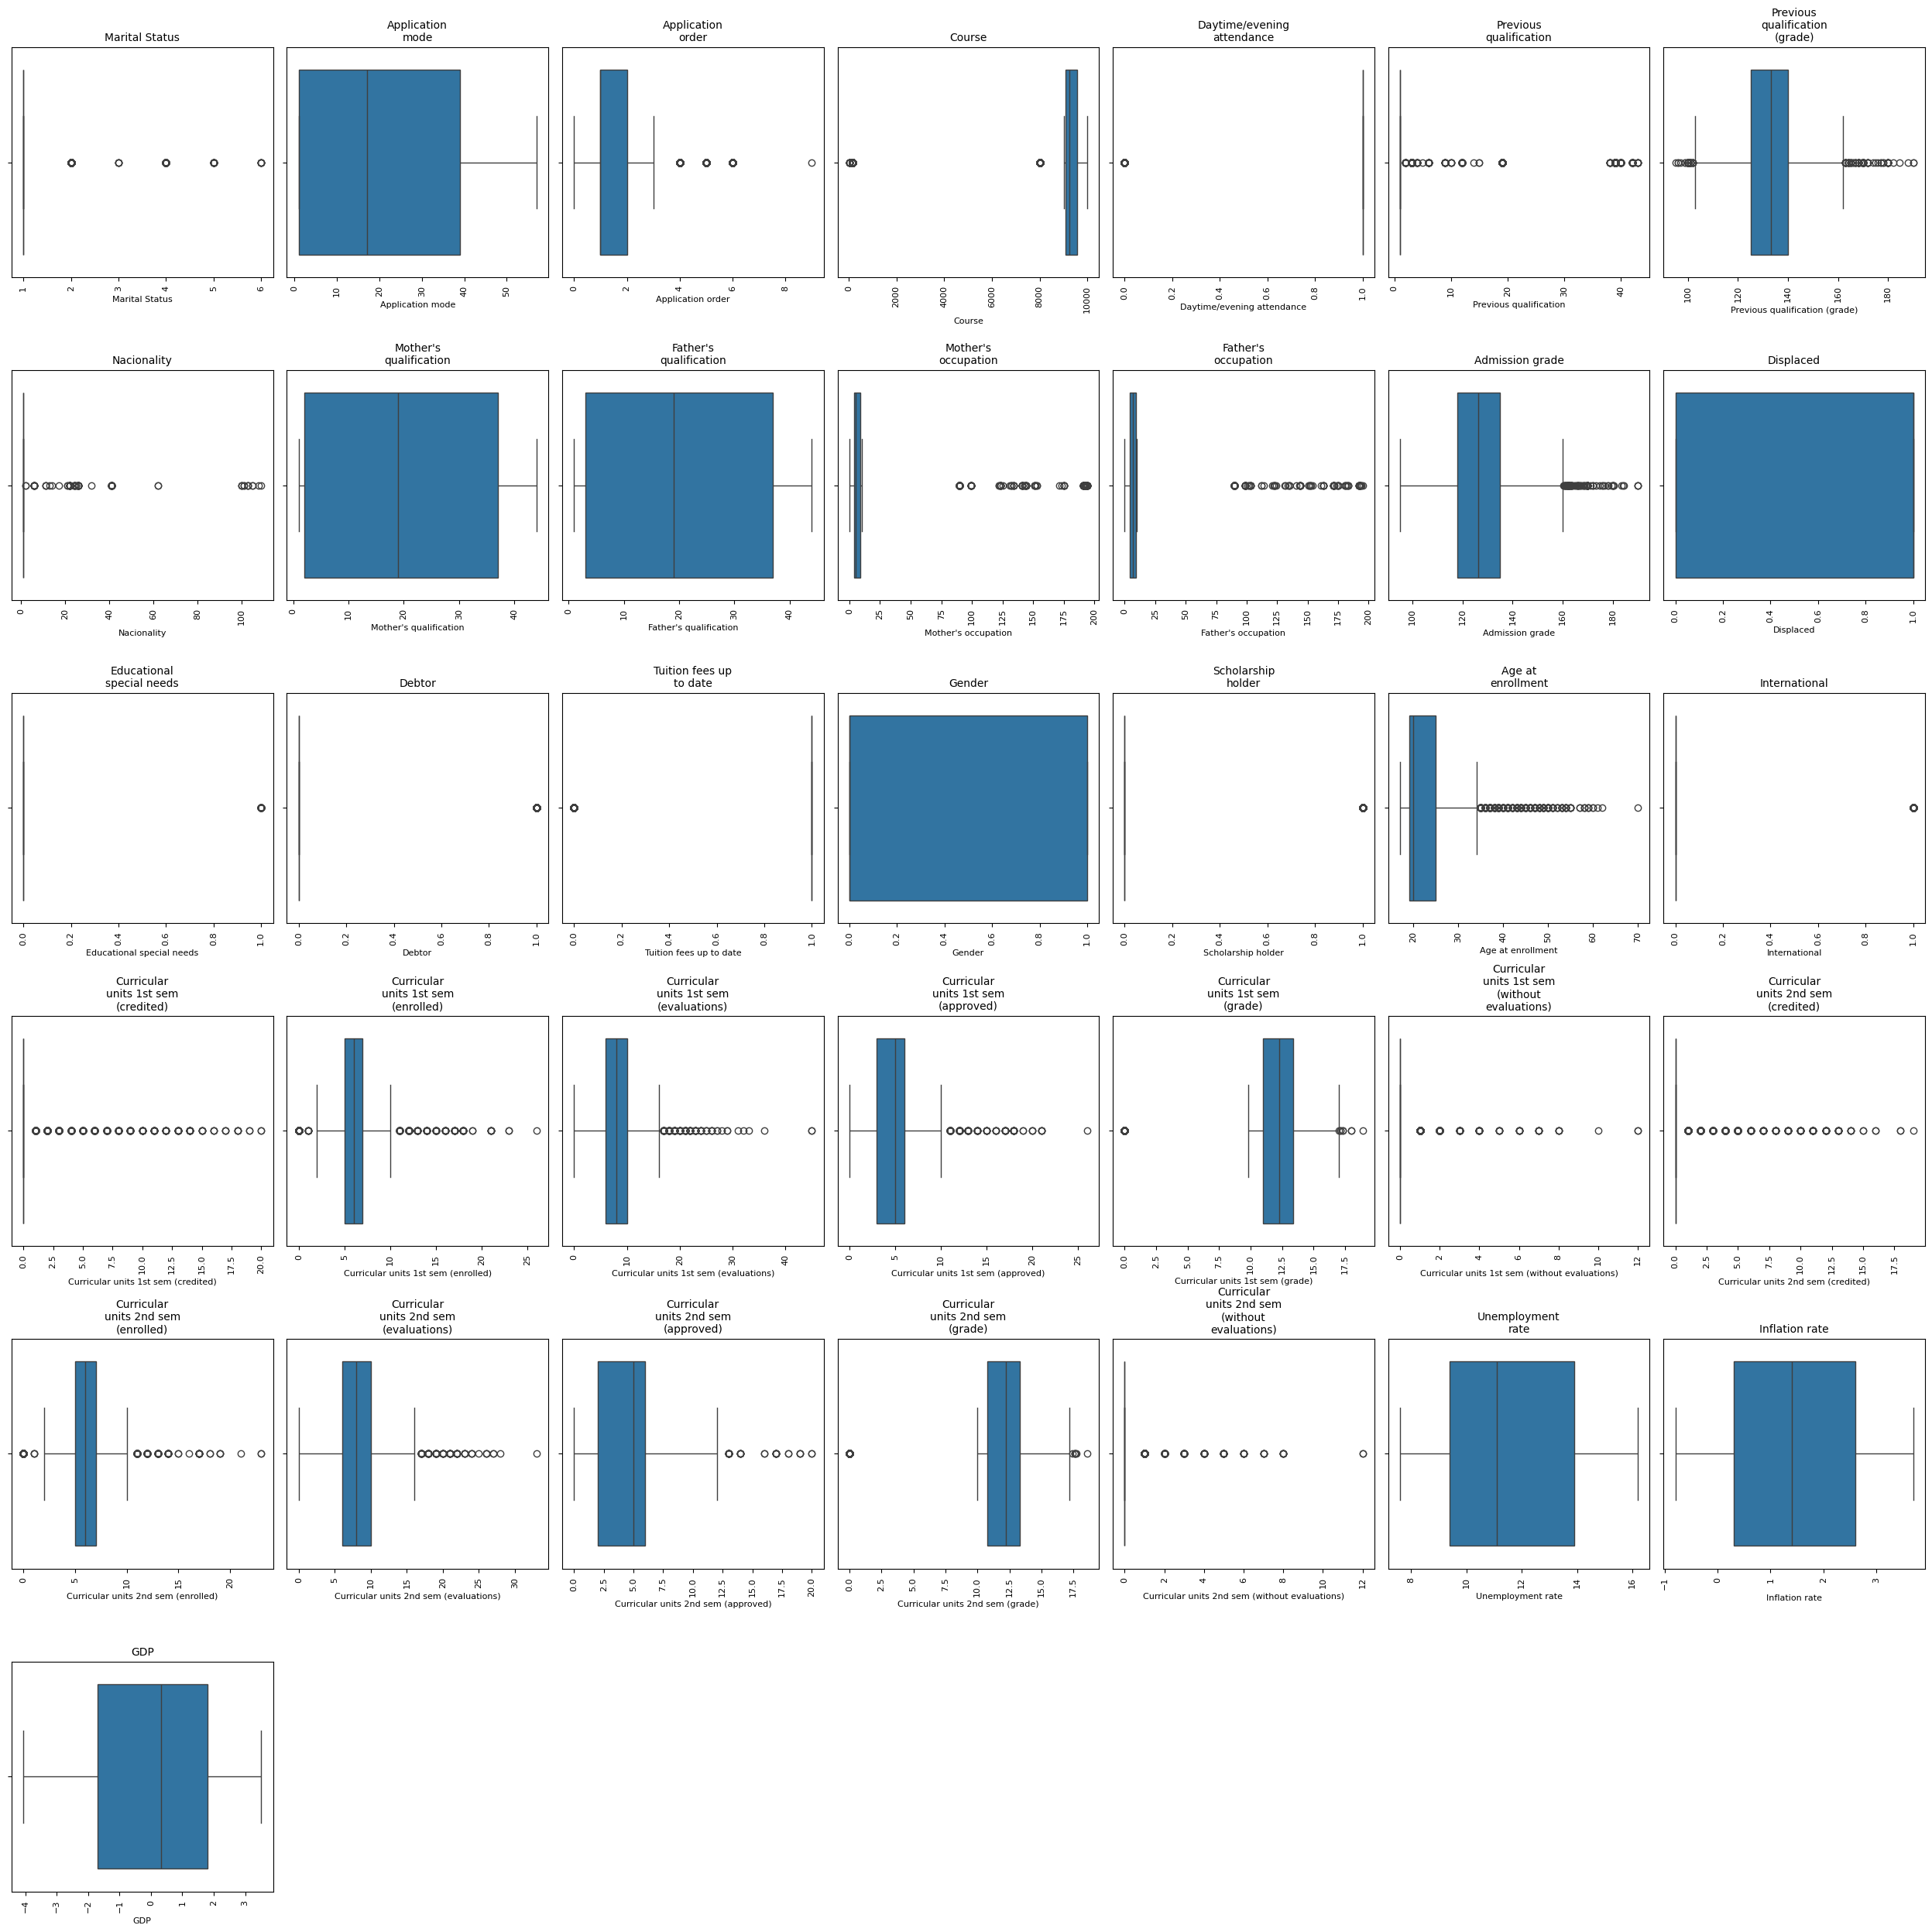

In [303]:
#create boxplot of the data in df

metrics_list = X.columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(25, 25))
axes = axes.flatten()

# Create a box plot for each column
for i, col in enumerate(metrics_list):
    sns.boxplot(data=df, x=col, ax=axes[i])
    
    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(col, width=15))
    axes[i].set_title(wrapped_title)
    
    axes[i].tick_params(axis='x', rotation=90)

# Hide any empty plots if there are fewer metrics than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

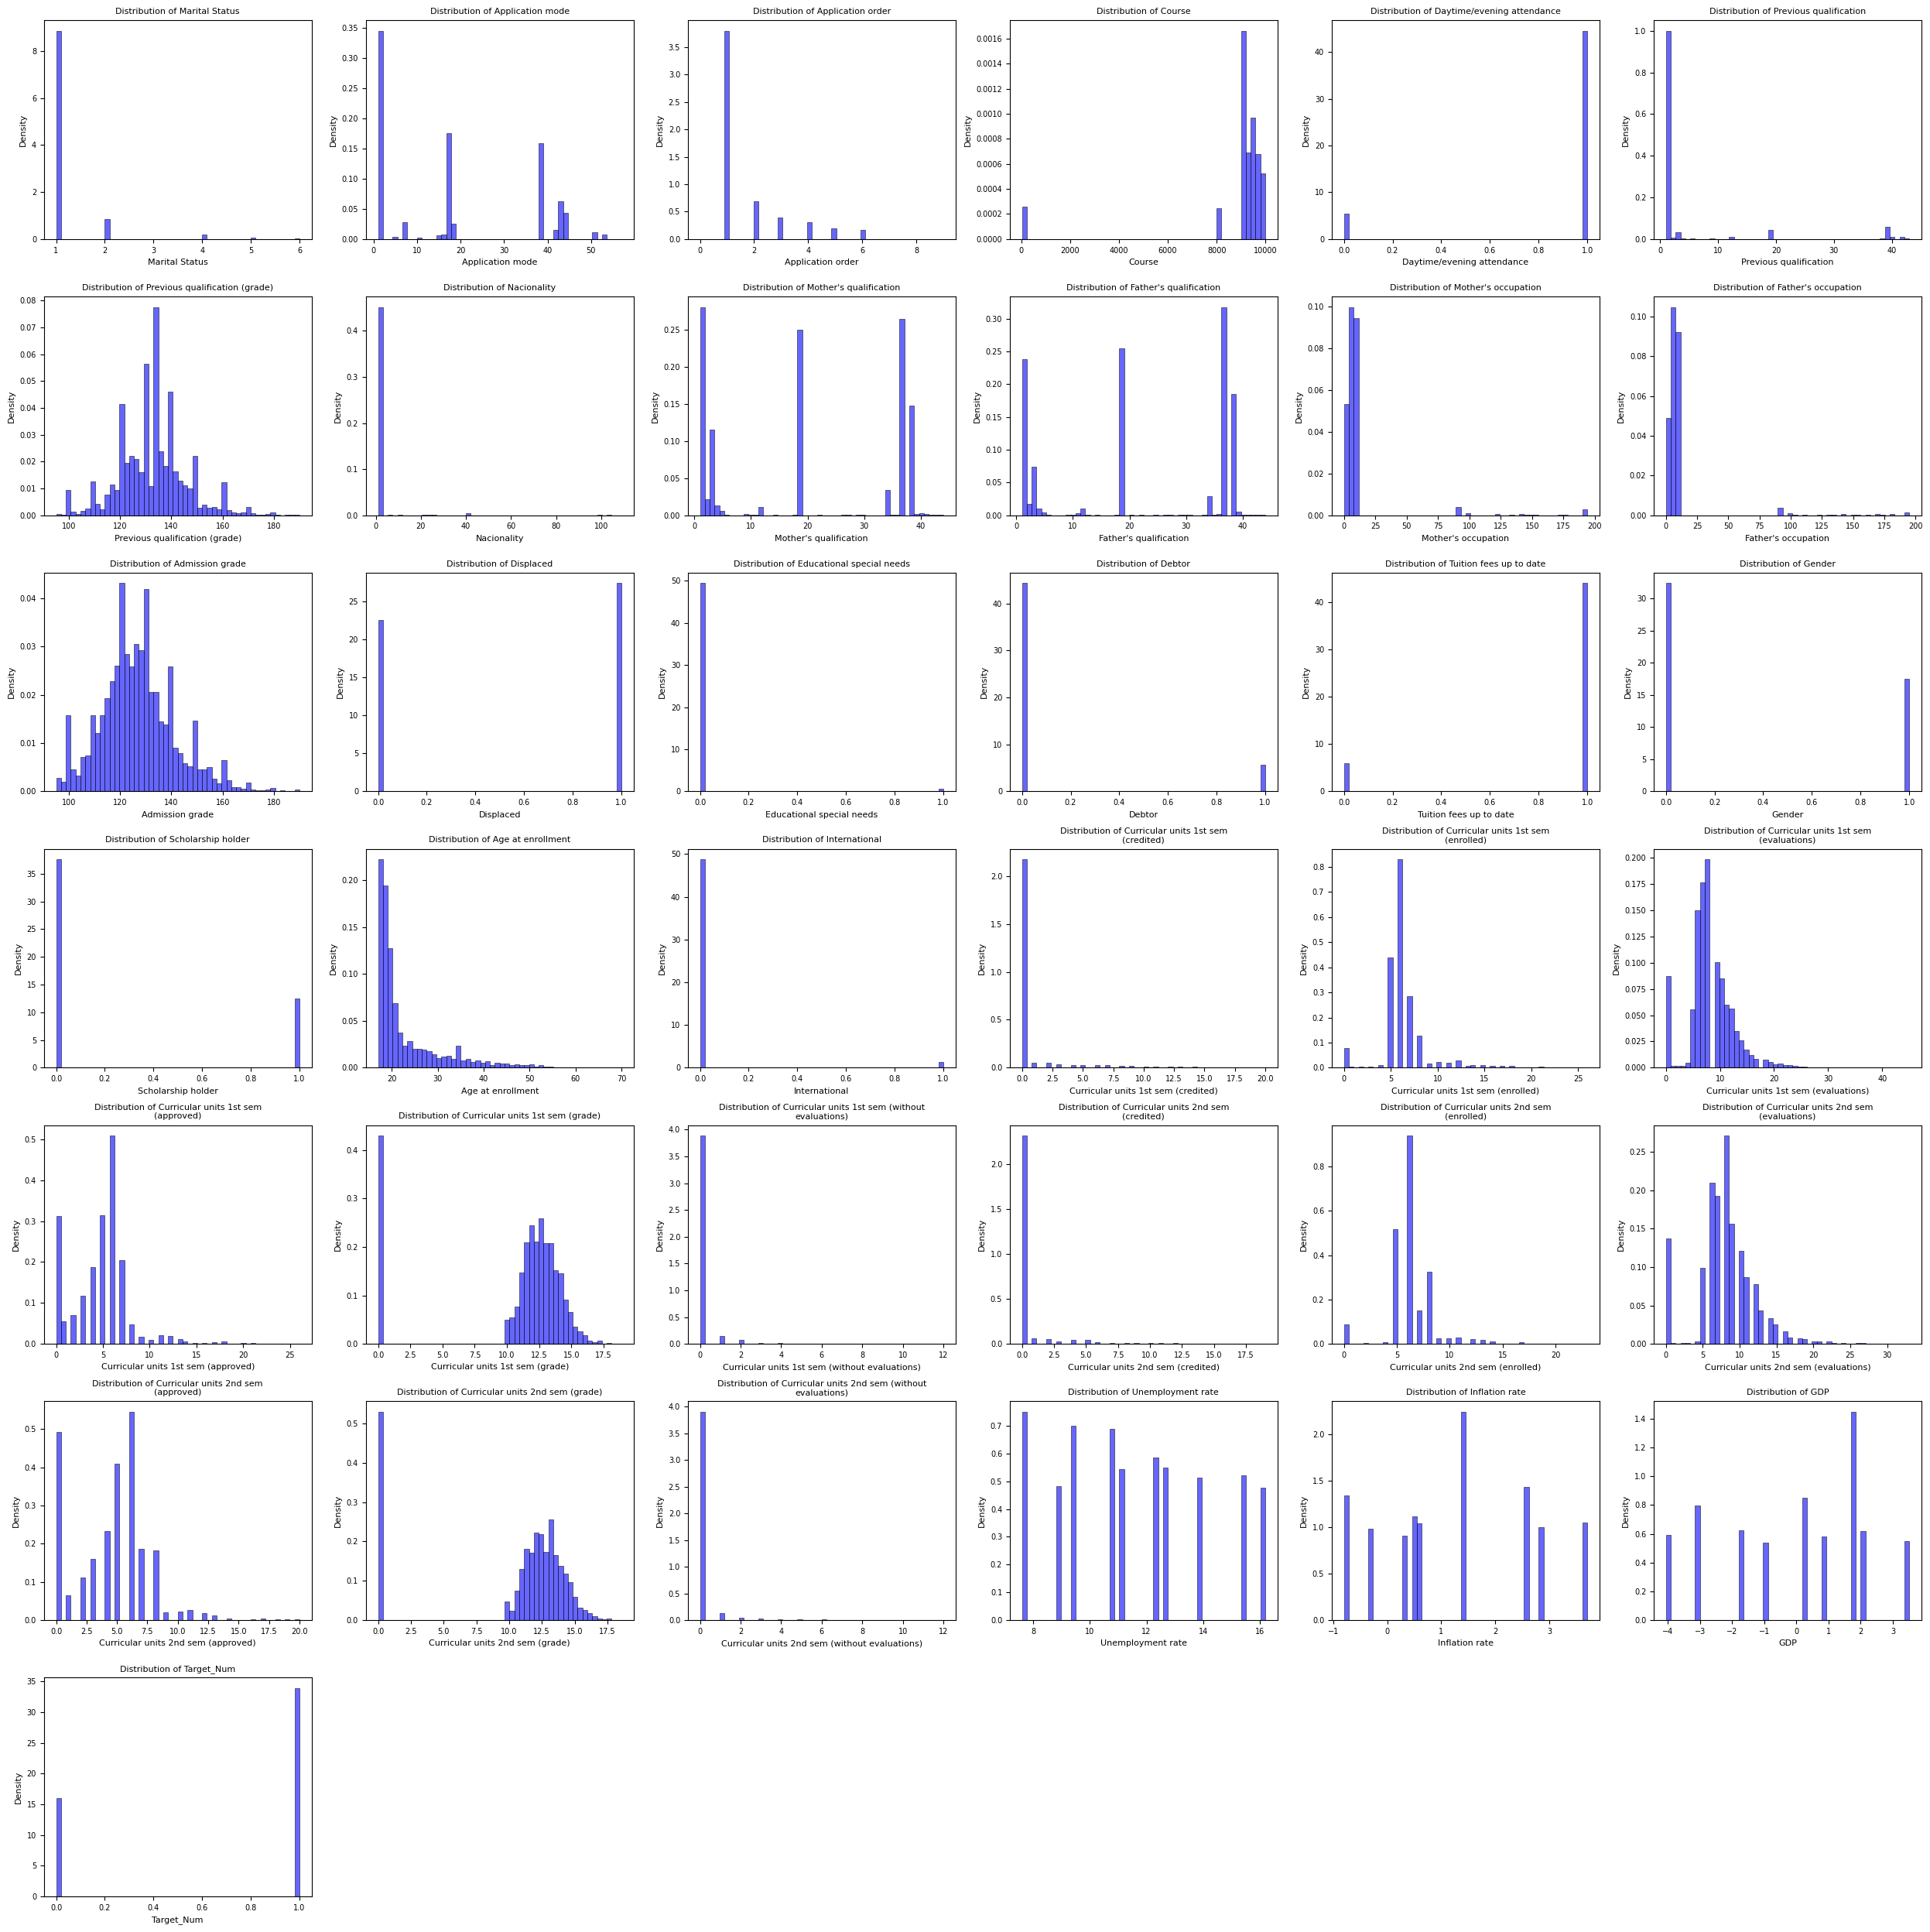

In [304]:
#create histograms of the target variable using eda_toolkit

from eda_toolkit import kde_distributions

vars_of_interest = df.columns.tolist() 

kde_distributions(
    df=df,
    kde=False,
    n_rows=7,
    n_cols=6,
    grid_figsize=(25, 25),  # Size of the overall grid figure
    single_figsize=(4, 4),  # Size of individual figures
    fill=True,
    fill_alpha=0.60,
    w_pad=1,
    h_pad=1,
    text_wrap=50,
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=50,
    plot_type="hist",
    label_fontsize=8,  # Font size for axis labels
    tick_fontsize=7,  # Font size for tick labels
)



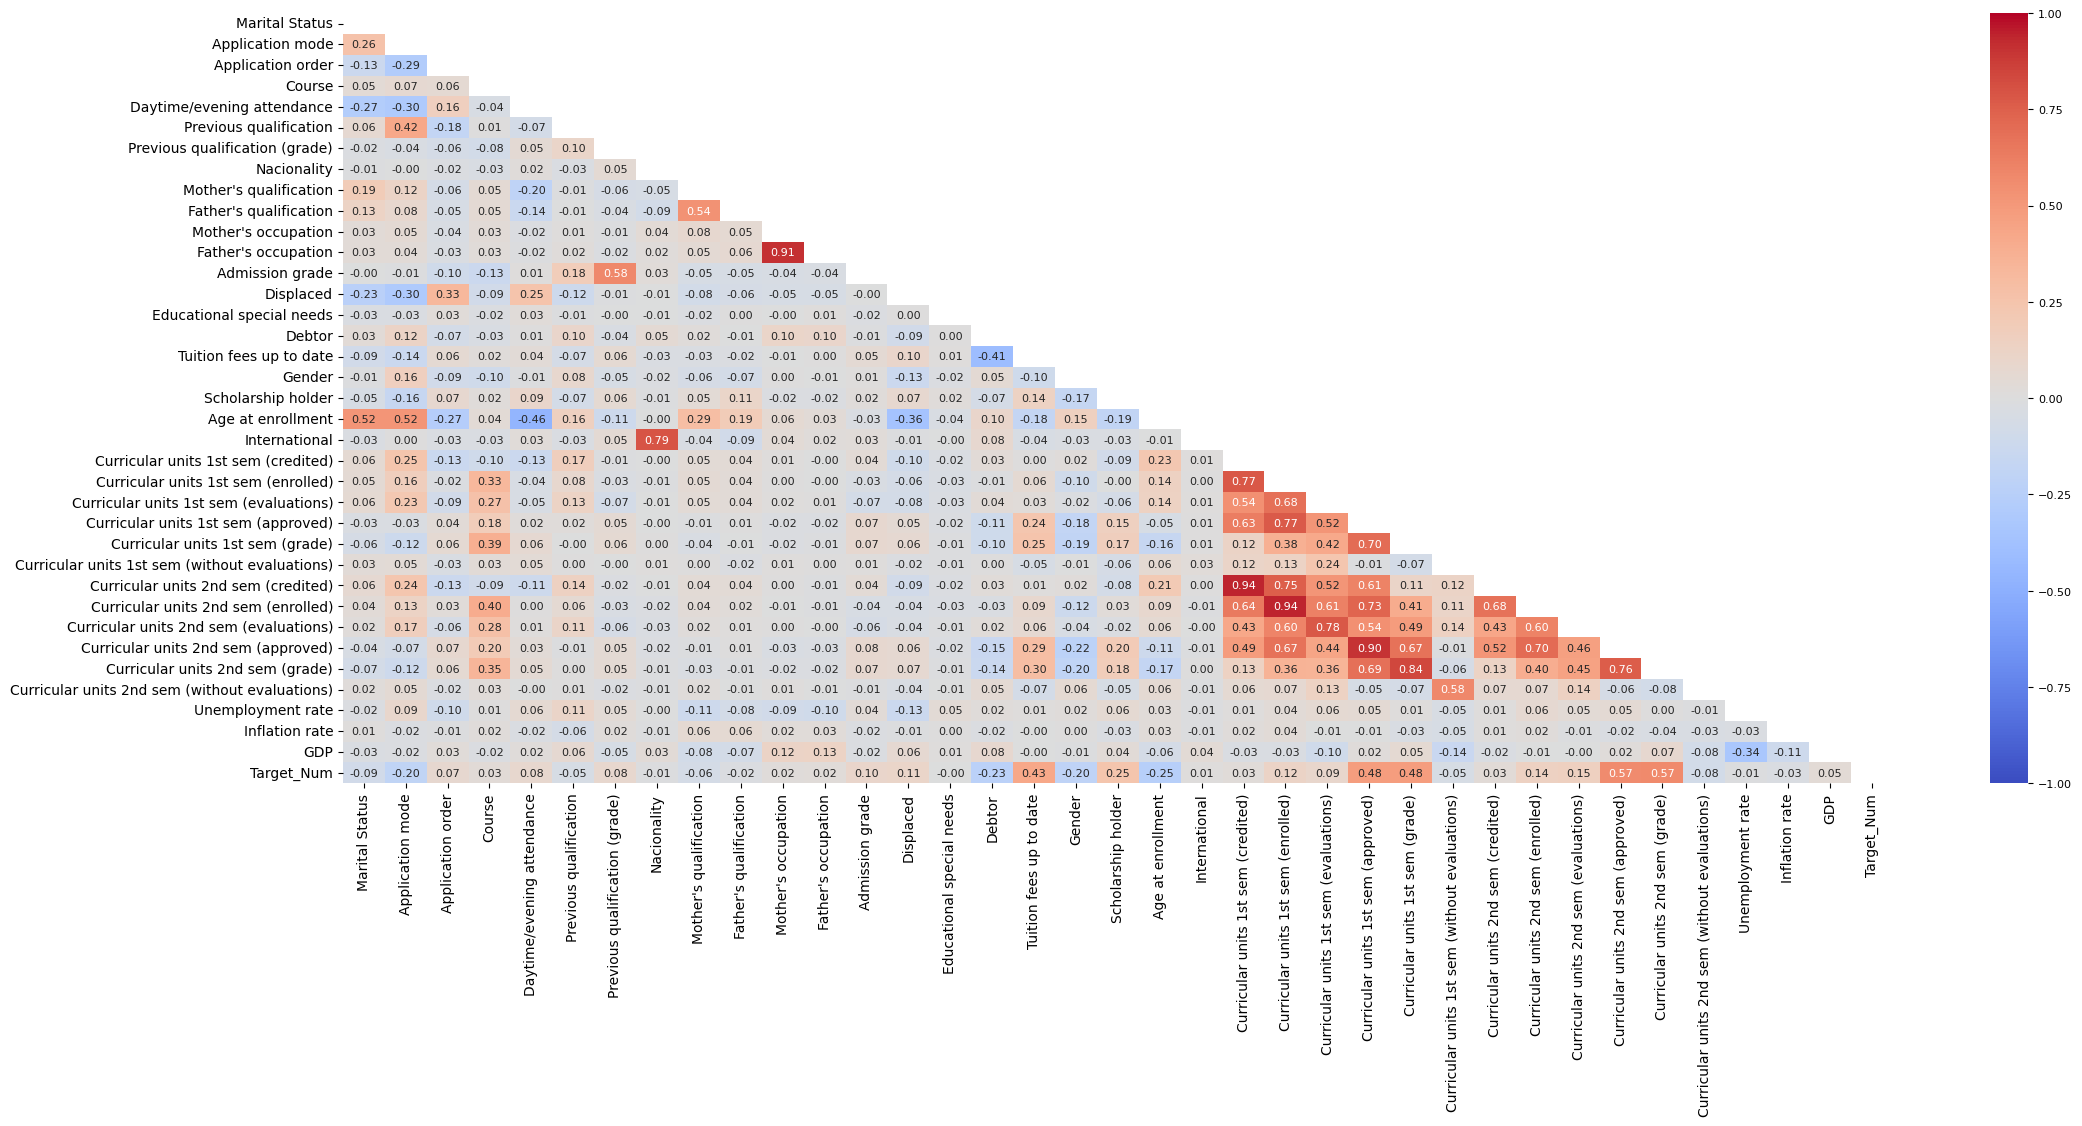

In [305]:
#create a correlation matrix of the data in df

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [306]:
# Calculate the correlation matrix
corr = df.corr()

# Extract the correlation with the target variable
target_corr = corr['Target_Num']

# Take the absolute value of the correlations
abs_target_corr = target_corr.abs()

# Sort the correlations in descending order and select the top 7 features
top_7_features = abs_target_corr.sort_values(ascending=False).head(8)  # Including Target_Num itself

# Exclude Target_Num from the result
top_7_features = top_7_features[top_7_features.index != 'Target_Num']

# Display the top 7 features and their correlations
print("The 7 features with the highest absolute correlation are:")
print(top_7_features)

The 7 features with the highest absolute correlation are:
Curricular units 2nd sem (grade)       0.571792
Curricular units 2nd sem (approved)    0.569500
Curricular units 1st sem (grade)       0.480669
Curricular units 1st sem (approved)    0.479112
Tuition fees up to date                0.429149
Age at enrollment                      0.254215
Scholarship holder                     0.245354
Name: Target_Num, dtype: float64


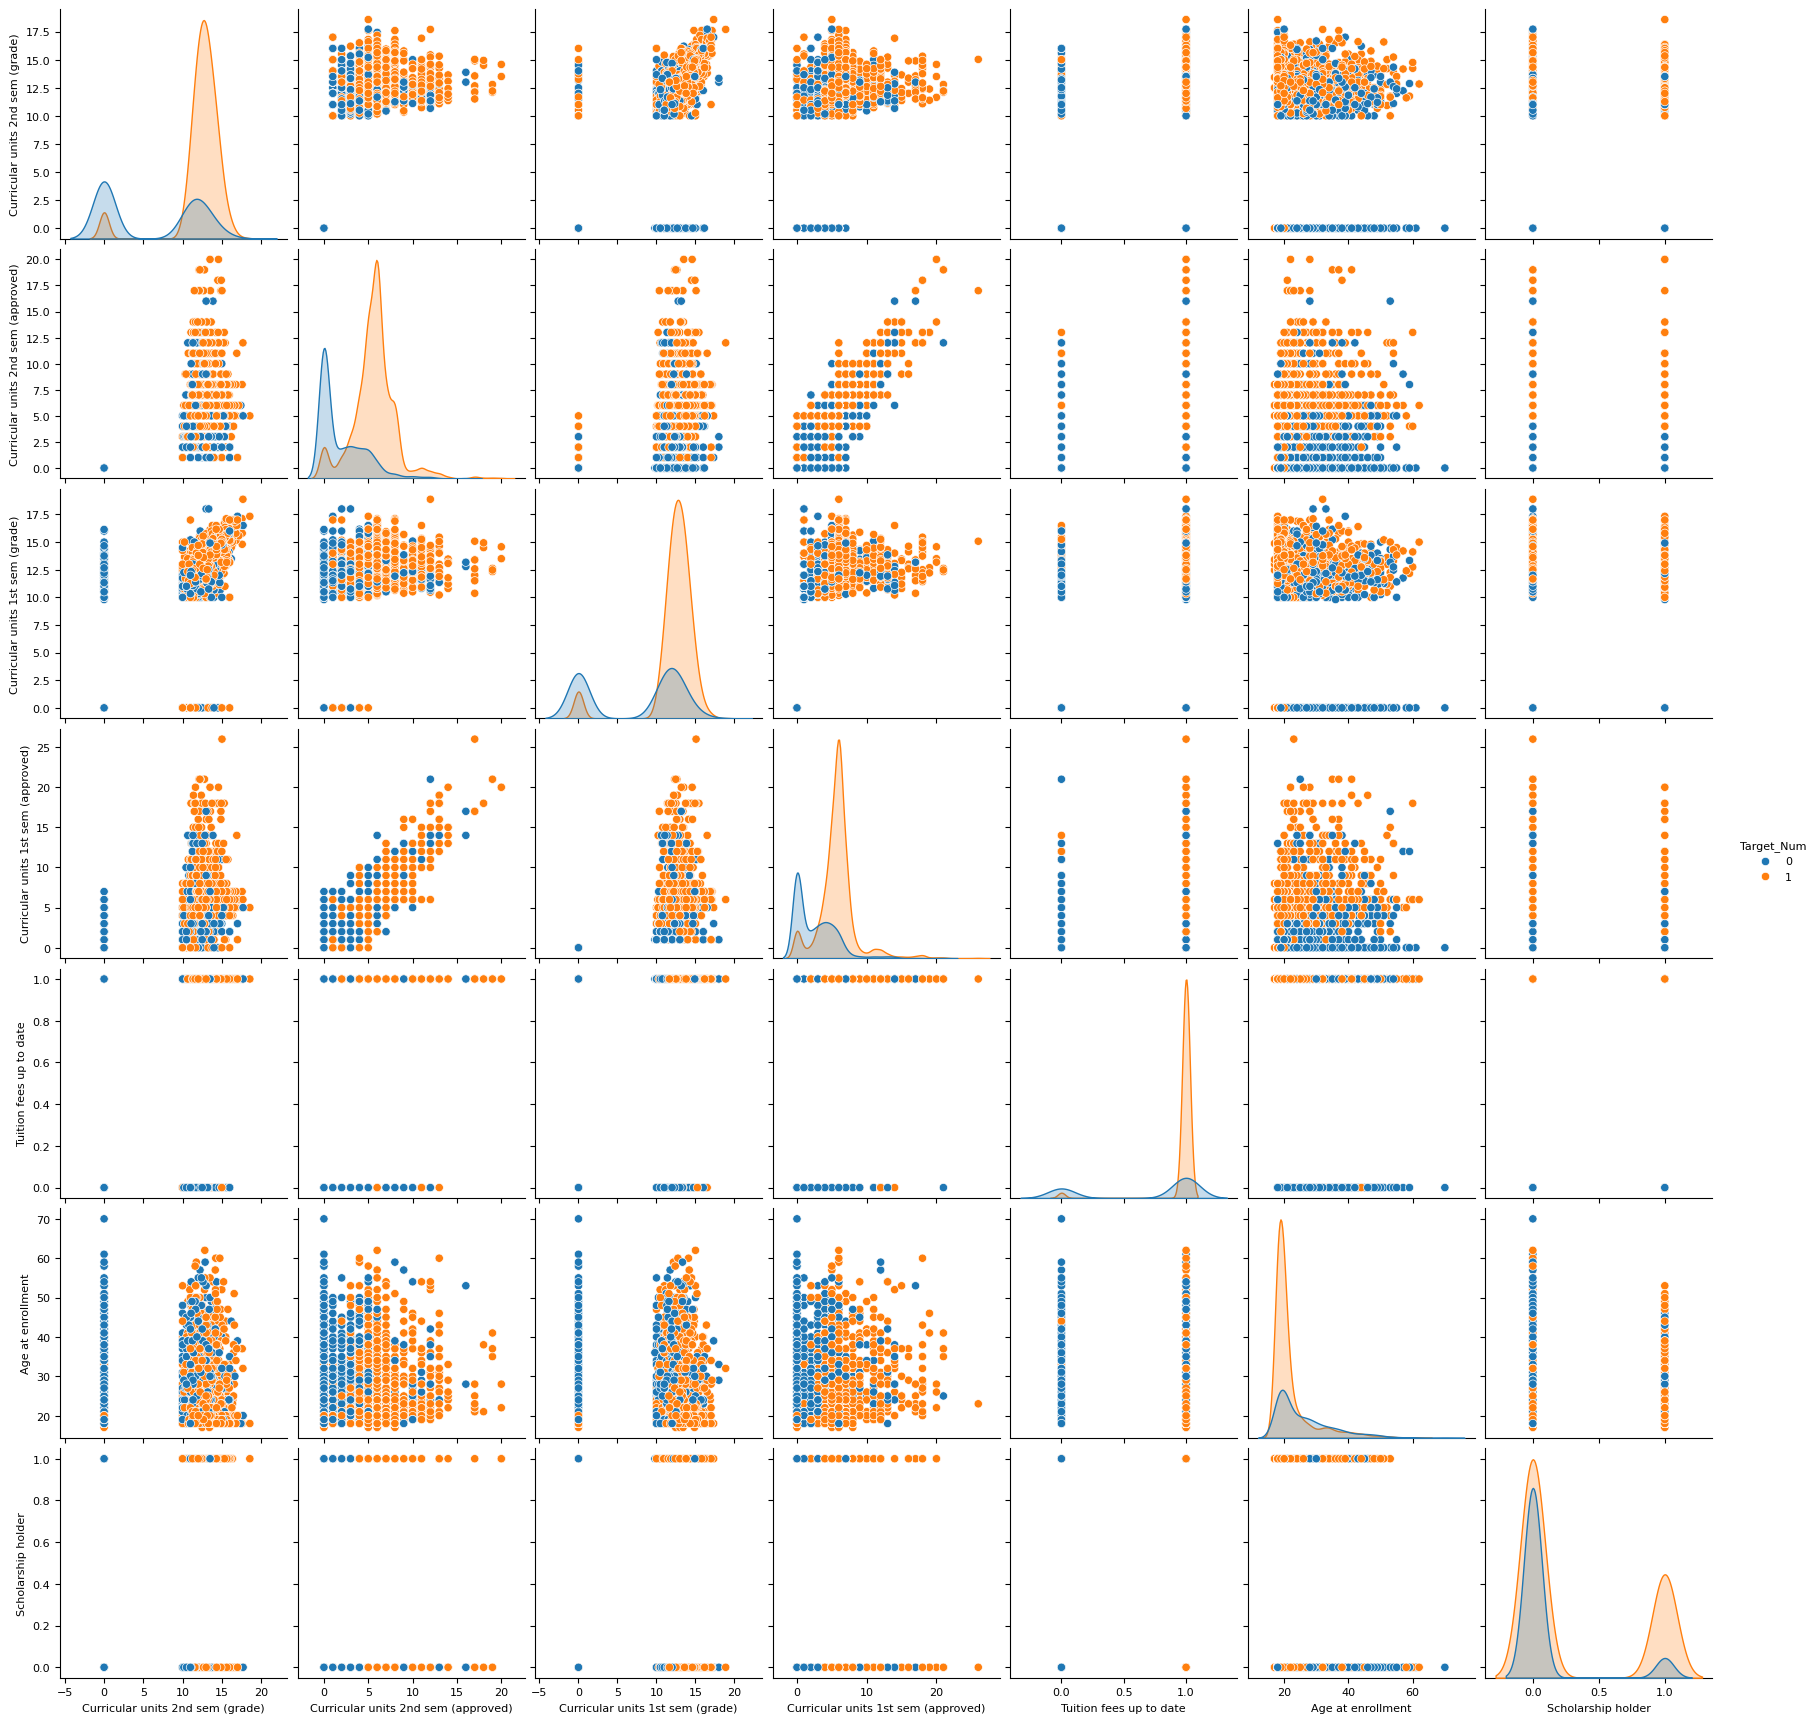

In [307]:
# Assume 'X' is your original DataFrame and 'selected_features' is a list of the features you want to keep
hc = ['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Age at enrollment', 'Scholarship holder']  

# Create a new DataFrame with only the selected features
X_selected = X[hc]

# Create a pairplot of the selected features against Target_Num
sns.pairplot(X_selected.join(df['Target_Num']), hue='Target_Num')

# Display the plot
plt.show()

Model Development and Training

Logistic Regression - Accuracy: 0.8426
[[303 138]
 [ 71 816]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       441
           1       0.86      0.92      0.89       887

    accuracy                           0.84      1328
   macro avg       0.83      0.80      0.82      1328
weighted avg       0.84      0.84      0.84      1328


Decision Tree - Accuracy: 0.7892
[[327 114]
 [166 721]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       441
           1       0.86      0.81      0.84       887

    accuracy                           0.79      1328
   macro avg       0.76      0.78      0.77      1328
weighted avg       0.80      0.79      0.79      1328


Random Forest - Accuracy: 0.8411
[[318 123]
 [ 88 799]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       441
           1       0.87      0.90      0.88       887

    ac

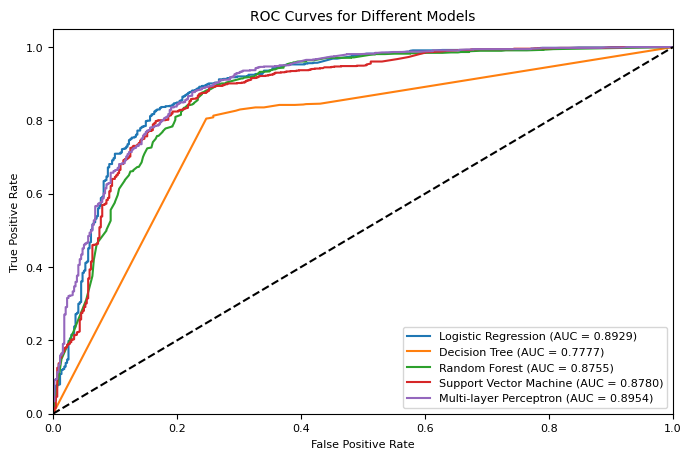

In [310]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)
mlp = MLPClassifier(max_iter=1000)

# List of models and their names
models = [log_reg, decision_tree, random_forest, svm, mlp]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "Multi-layer Perceptron"]

# Training and evaluating models
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    # Predict the test set results
    y_pred = model.predict(X_test)
    # Print model evaluation metrics
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

# ROC Curves for model comparison
plt.figure(figsize=(8, 5))
for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

Model Improvements

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.868606909117062
Accuracy: 0.8395480225988701
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       316
           1       0.84      0.93      0.88       569

    accuracy                           0.84       885
   macro avg       0.84      0.80      0.82       885
weighted avg       0.84      0.84      0.84       885



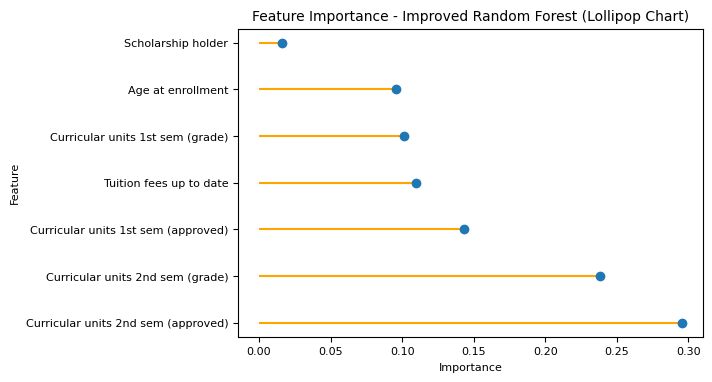

<Figure size 500x300 with 0 Axes>

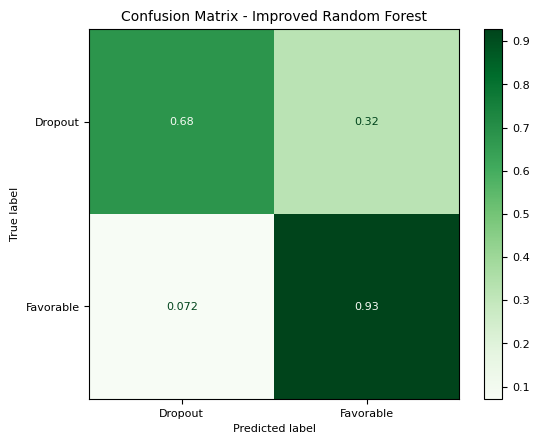

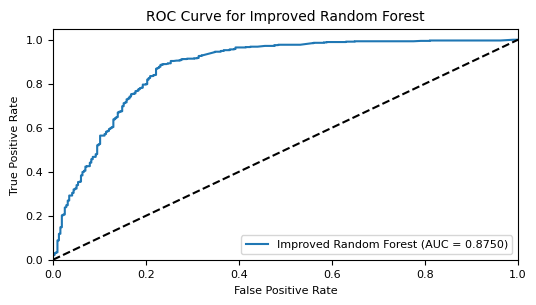

In [309]:
# Using the high correlation features identified earlier
X = df[hc]  
y = df['Target_Num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Feature importance visualization
feature_importances = best_rf_model.feature_importances_
features = hc

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization using a lollipop chart for feature importance
plt.figure(figsize=(6, 4))
plt.hlines(y=importance_df['Feature'], xmin=0, xmax=importance_df['Importance'], color='orange')
plt.plot(importance_df['Importance'], importance_df['Feature'], "o")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Improved Random Forest (Lollipop Chart)')
plt.show()

# Confusion matrix visualization
plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, display_labels=['Dropout', 'Favorable'], cmap=plt.cm.Greens, normalize='true')
plt.title('Confusion Matrix - Improved Random Forest')
plt.show()

# ROC Curve
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, label=f"Improved Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Improved Random Forest')
plt.legend(loc='lower right')
plt.show()